In [2]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
from PIL import Image
import os
%matplotlib inline

In [3]:
path_to_data = '../../../xview_data'

In [4]:
# Get all coords, chips, and classes
coords, chips, classes = wv.get_labels('{}/xView_train.geojson'.format(path_to_data))

100%|██████████| 601937/601937 [00:03<00:00, 193980.57it/s]


In [1]:
# Sanity check stats
print('Shapes')
print('coords: {}'.format(coords.shape))
print('chips: {}'.format(chips.shape))
print('classes: {}'.format(classes.shape))

print('\nAn example')
print('coords[1]: {}'.format(coords[1]))
print('chips[1]: {}'.format(chips[1]))
print('classes[1]: {}'.format(classes[1]))

print('\nNum unique chips: {}'.format(len(set(chips))))
print('Num unique classes: {}'.format(len(set(classes))))

Shapes


NameError: name 'coords' is not defined

### Histogram of classes
Major class imbalance!

In [14]:
class_counts = np.bincount(classes.astype(int))

labels_dict = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels_dict[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [32]:
labels = []
counts = []

for i in labels_dict:
    labels.append(labels_dict[i])
    counts.append(class_counts[i])
    
counts, labels = zip( *sorted( zip(counts, labels) ) )

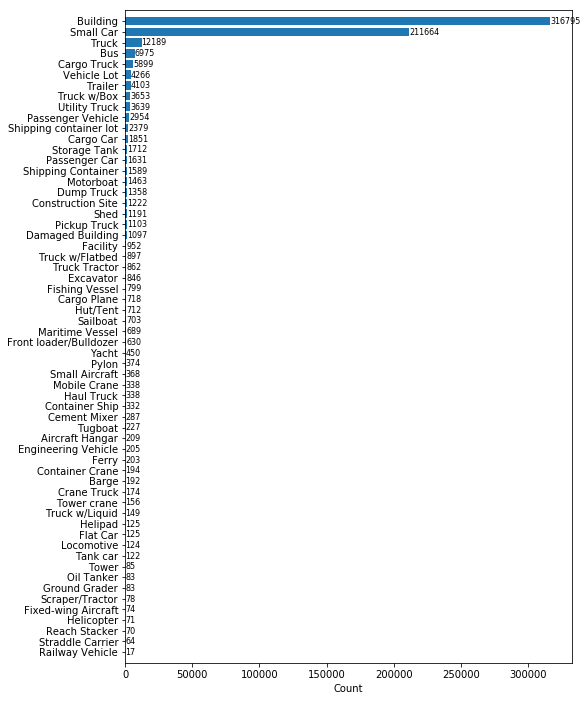

In [53]:
x = np.arange(len(counts))
plt.figure(figsize=(8,12))
plt.barh(x, np.array(counts), align='center')
plt.yticks(x, labels)
plt.xlabel('Count')
plt.ylim(min(x)-1, max(x)+1)
for i, v in enumerate(counts):
    plt.text(v + 5, i - .25, str(v), color='black', fontsize=8)
plt.show()

### Number of bounding boxes per chip

In [17]:
objs_per_img = []

labels_path = '{}/yolo_data/labels'.format(path_to_data)

label_files = os.listdir(labels_path)
for label_file in label_files:
    num_lines = sum(1 for line in open('{}/{}'.format(labels_path, label_file)) if line[0] != '0')
    objs_per_img.append(num_lines)

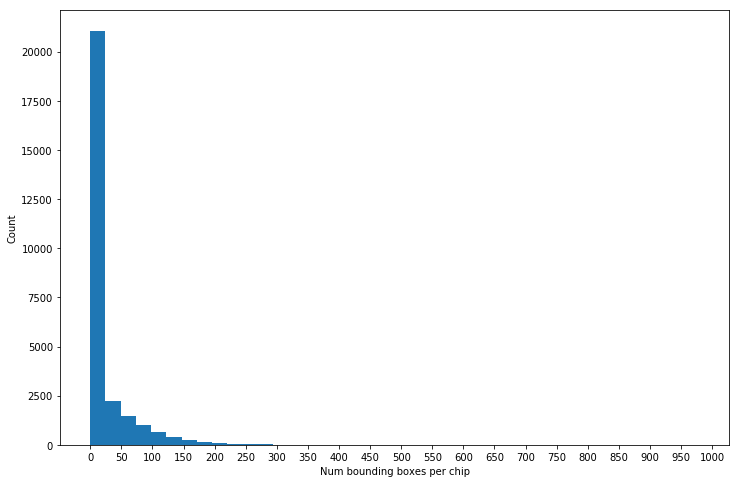

In [32]:
plt.figure(figsize=(12,8))
plt.hist(objs_per_img, 40)
plt.xlabel('Num bounding boxes per chip')
plt.ylabel('Count')
plt.xticks(np.linspace(0, 1000, num=21))
plt.show()

### Size and aspect ratio of bounding boxes
No clear patterns in aspect ratio.

In [44]:
widths = []
heights = []
areas = []

label_files = os.listdir(labels_path)
for label_file in label_files:
    f = open('{}/{}'.format(labels_path, label_file))
    for line in f:
        if line[0] == '0': break
        bbox = line.strip().split(' ')
        w = float(bbox[3])
        h = float(bbox[4])
        widths.append(w)
        heights.append(h)
        areas.append(w * h)

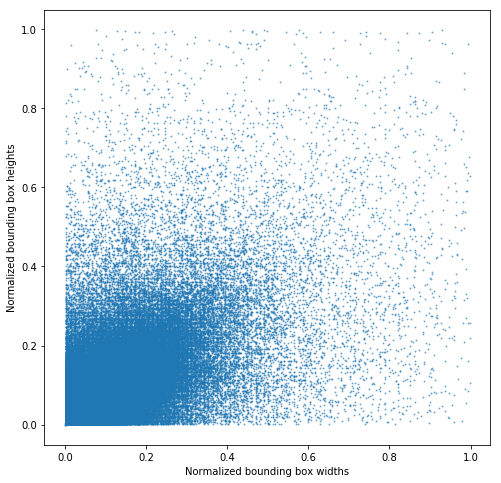

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(widths, heights, s=1, alpha=.5)
plt.xlabel('Normalized bounding box widths')
plt.ylabel('Normalized bounding box heights')
plt.show()

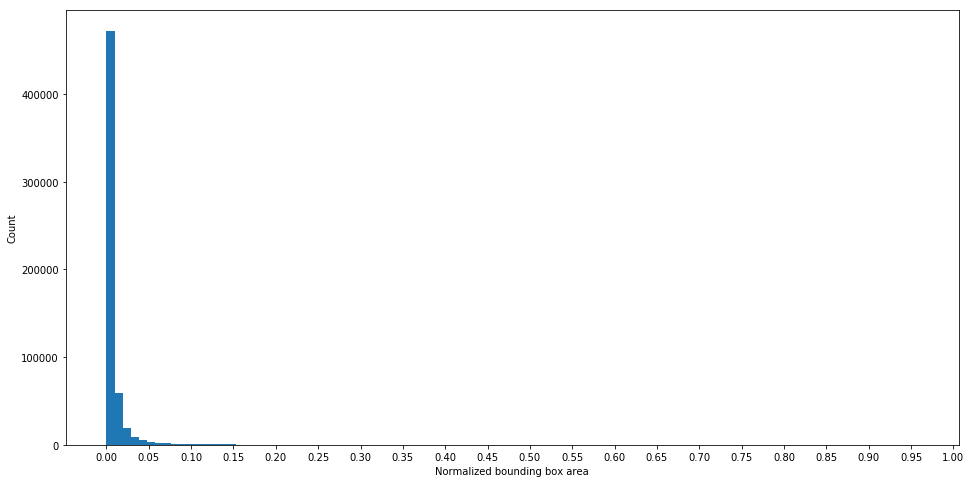

In [53]:
plt.figure(figsize=(16,8))
plt.hist(areas, 100)
plt.xlabel('Normalized bounding box area')
plt.ylabel('Count')
plt.xticks(np.linspace(0, 1, num=21))
plt.show()